# Networks

The main goal of this notebook is reviewing the basic concepts of networks and graph theory. We will use the `networkx` library to create and manipulate networks.

- Graphs are mathematical structures used to model pairwise relations between objects. A graph in mathematics and computer science consists of a set of objects:
- **nodes** or **vertices**, and a set of **edges** that connect pairs of vertices.

- An edge can be seen as a line or a curve that joins two vertices. Formally, a graph is a pair of sets (V, E), where V is the set of vertices and E is the set of edges, connecting the pairs of vertices.

- Additionally, we can assign a **weight** to each edge, which represents the strength of the relationship between the vertices.
    - If the weight is not assigned, we assume that all edges have the same weight. In this notebook, we will use the terms *edge* and *link* interchangeably.

### Graphs Properties:

- **Degree**: The degree of a node is the number of edges connected to the node.
- **Path**: A path is a sequence of nodes connected by edges.
- **Connected graph**: A graph is connected if there is a path between every pair of vertices.
- **Connected component**: A connected component of a graph is a subgraph in which every two vertices are connected to each other by paths, and which is connected to no additional vertices in the supergraph.
- **Diameter**: The diameter of a graph is the longest path between any two nodes in a graph.
- **Density**: The density of a graph is the ratio of the number of edges and the number of possible edges.
- **Clustering coefficient**: The clustering coefficient of a node is the ratio between the number of existing edges and the number of all possible edges.
- **Assortativity**: Assortativity measures the similarity of connections in the graph with respect to the node degree. A positive assortativity coefficient indicates that nodes tend to link to other nodes with the same or similar degree.

In [393]:
import networkx as nx
import matplotlib.pyplot as plt
import community
import pandas as pd
import numpy as np
import warnings

pd.set_option('display.max_rows', 100)
#warnings.filterwarnings("ignore")

**Max Number of Edges**

Considering the combinations of edges that can be created between nodes, the maximum number of edges in a graph can be calculated using the formula:

$$
C(n, k) = \frac{n!}{k! (n - k)!}
$$

Where $n$ is the number of nodes and $k$ is the number of edges.

- For an **undirected graph**, **k=2** the number of edges is:

$$\frac{n(n-1)}{2}$$

- For a **directed graph**, the number of edges is:

$$n(n-1)$$

**Density**

Measures the proportion of the potential connections that are actual connections. In other words, how close a graph is to complete. The formula to calculate the density is:

$$D = \frac{L}{Lmax}$$

Where $L$ is the number of edges and $Lmax$ is the maximum number of edges that can be created in a graph with $n$ nodes.

**Example**:

- Network with 5 nodes:

Lmax = 10 (undirected graph) since $Lmax = \frac{5(5-1)}{2} = 10$

if the network has only 5 edges, the density is:

$$D = \frac{5}{10} = 0.5$$

The network is 50% dense.

**Assortativity**:

- Tendência dos nós semelhantes se conectarem entre si.

- Pessoas com características semelhantes tendem a se associar.

In [394]:
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(1,4),(2,3),(3,4),(4,5)])

assortativity = nx.degree_assortativity_coefficient(G)
print("Assortativity:", assortativity)

Assortativity: -0.2857142857142857


**Homofilia (Homophily)**:

- Tendência de indivíduos semelhantes se associarem.
- Exemplo disso com base em algum atributo de nó: gênero.

In [395]:
# adding attribute to nodes
G.nodes[1]['gender'] = 'male'
G.nodes[2]['gender'] = 'female'

# homophily based on gender
homophily = nx.attribute_assortativity_coefficient(G, 'gender')
print("Homophily (gender):", homophily)

Homophily (gender): -0.17073170731707316


**Paths**:

Sequências de nós conectados por arestas.
O comprimento médio do caminho mais curto em uma rede pode medir a eficiência da comunicação.

In [396]:
average_shortest_path_length = nx.average_shortest_path_length(G)
print("Average shortest path:", average_shortest_path_length)

Average shortest path: 1.5


**Conectividade e componentes:**

Verificando se a rede é conectada e identificando os componentes conectados.

In [397]:
# verificando se a rede é conectada
is_connected = nx.is_connected(G)
print("Connected:", is_connected)

# componentes conectados
connected_components = list(nx.connected_components(G))
print("Connected components:", connected_components)

Connected: True
Connected components: [{1, 2, 3, 4, 5}]


**Distância social:**

A distância social entre dois nós é o comprimento do caminho mais curto entre eles na rede. Isso pode ser útil para medir a proximidade entre os indivíduos.

In [398]:
# Calculando a distância social entre dois nós
social_distance = nx.shortest_path_length(G, source=1, target=5)
print("Distância social entre 1 e 5:", social_distance)

Distância social entre 1 e 5: 2


In [399]:
import json

## Practice 1

In [400]:
with open('../rsc/basic-network.json', 'r') as f:
    data = json.load(f)
  
data

{'nodes': ['A', 'B', 'C'], 'edges': [['A', 'B'], ['B', 'C'], ['C', 'A']]}

In [401]:
def to_graph(data: dict) -> nx.Graph:
    """
    Convert a dictionary to a networkx graph
    Args:
        data: dict: A dictionary with nodes and edges
    Returns:
        G: nx.Graph: A networkx graph
    """
    
    G = nx.Graph()
    G.add_nodes_from(data['nodes'])
    G.add_edges_from(data['edges'])
    return G

G = to_graph(data)

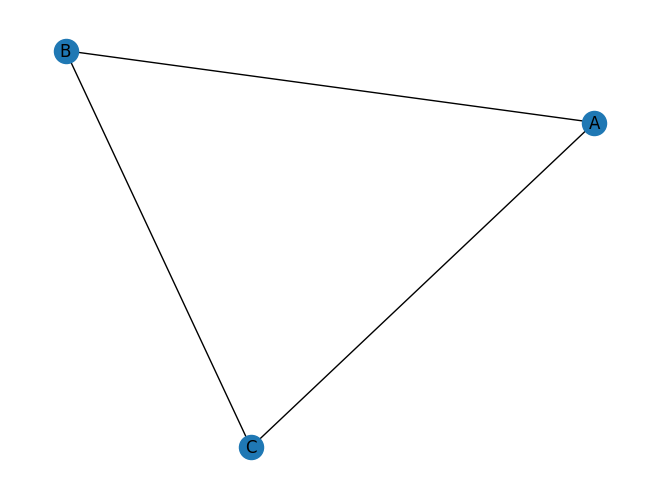

In [402]:
# plot the networkx graph using plotly
def plot_networkx(G: nx.Graph):
    """
    Plot a networkx graph using matplotlib
    Args:
        G: nx.Graph: A networkx graph
    """
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True)
    plt.show()
    
plot_networkx(G)

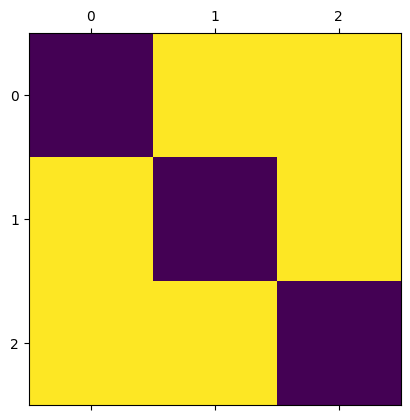

In [403]:
def plot_adjacency_matrix(G: nx.Graph):
    """
    Plot the adjacency matrix of a networkx graph
    Args:
        G: nx.Graph: A networkx graph
    """
    A = nx.adjacency_matrix(G).todense()
    plt.matshow(A)
    plt.show()

plot_adjacency_matrix(G)

In [404]:
# calculando a densidade da rede
def density(G: nx.Graph, undirected: bool = True) -> float:
    """
    Calculate the density of a networkx graph
    Args:
        G: nx.Graph: A networkx graph
    Returns:
        density: float: The density of the graph
    """
    n = G.number_of_nodes()
    m = G.number_of_edges()
    
    if undirected:
        return m / (n * (n - 1))
    
    return m / (n * (n - 1) * 2)

density(G)

0.5

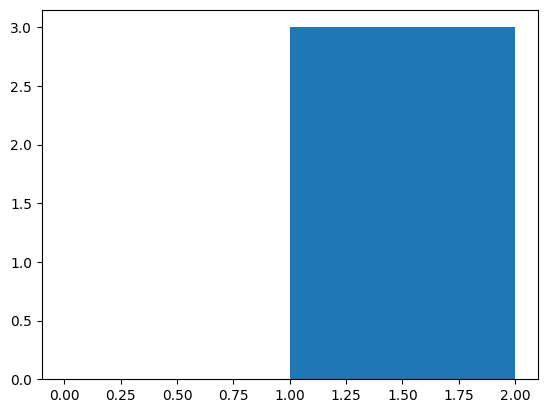

In [405]:
def plot_degree_distribution(G: nx.Graph):
    """
    Plot the degree distribution of a networkx graph
    Args:
        G: nx.Graph: A networkx graph
    """
    degrees = [G.degree(n) for n in G.nodes()]
    plt.hist(degrees, bins=range(max(degrees)+1))
    plt.show()

plot_degree_distribution(G)

## Practice 2

In [406]:
with open('../rsc/basic-network-al.json', 'r') as f:
    data = json.load(f)
    
data

{'A': ['L', 'N', 'P', 'B', 'K', 'A'],
 'B': ['A', 'J', 'G', 'F', 'M', 'S'],
 'C': ['N', 'H'],
 'D': ['R', 'J'],
 'E': ['O', 'M', 'E', 'Q', 'P'],
 'F': ['B', 'H', 'R', 'P'],
 'G': ['B', 'S', 'O', 'T', 'Q', 'P', 'J', 'N', 'R'],
 'H': ['C', 'F'],
 'I': ['R', 'T', 'K', 'S'],
 'J': ['B', 'D', 'G', 'J'],
 'K': ['A', 'I', 'S', 'O', 'T'],
 'L': ['A', 'O', 'N', 'Q'],
 'M': ['B', 'E', 'N', 'R'],
 'N': ['A', 'C', 'G', 'L', 'M', 'P', 'R'],
 'O': ['E', 'G', 'K', 'L', 'Q'],
 'P': ['A', 'E', 'F', 'G', 'N', 'T', 'R'],
 'Q': ['E', 'G', 'L', 'O', 'S'],
 'R': ['D', 'F', 'G', 'I', 'M', 'N', 'P'],
 'S': ['B', 'G', 'I', 'K', 'Q'],
 'T': ['G', 'I', 'K', 'P']}

In [407]:
def to_graph(data):
    G = nx.Graph()
    for node, neighbors in data.items():
        G.add_node(node)
        G.add_edges_from((node, neighbor) for neighbor in neighbors)
    return G

In [408]:
def node_degrees(G):
    degrees = dict()
    for node in G.nodes():
        degrees[node] = G.degree(node)
    return degrees

node_degrees(G)

{'A': 2, 'B': 2, 'C': 2}

In [409]:
def node_degree(G: nx.Graph, node: int) -> int:
    """
    Calculate the degree of a node in a networkx graph
    Args:
        G: nx.Graph: A networkx graph
        node: int: The node to calculate the degree
    Returns:
        degree: int: The degree of the node
    """
    return G.degree(node)

node_degree(G, 'A')

2

In [410]:
def node_degree(G: nx.Graph, node: str) -> int:
    """
    Calculate the degree of a node in a graph
    Args:
        G: nx.Graph: The Graph
        node: str: The node to calculate the degree
    Returns:
        degree: int: The degree of the node
    """
    return len(G[node])
    

node_degree(G, 'A')

2

Node degrees: {'A': 7, 'L': 4, 'N': 7, 'P': 7, 'B': 6, 'K': 5, 'J': 5, 'G': 9, 'F': 4, 'M': 4, 'S': 5, 'C': 2, 'H': 2, 'D': 2, 'R': 7, 'E': 6, 'O': 5, 'Q': 5, 'T': 4, 'I': 4}
Density: 0.13157894736842105


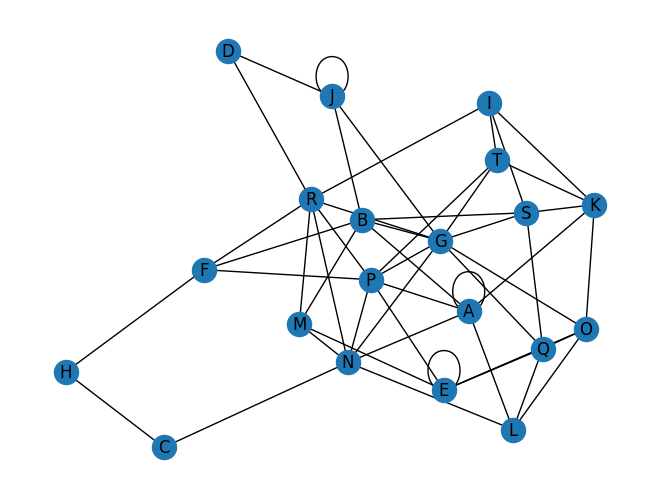

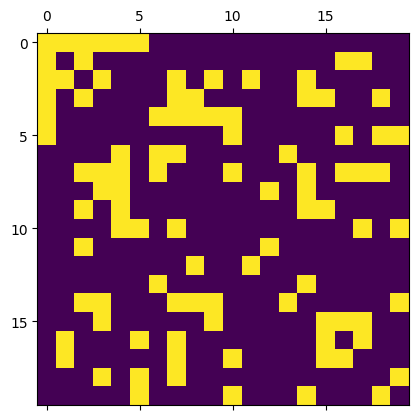

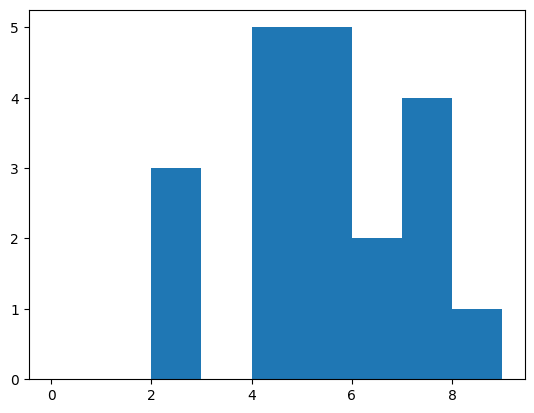

In [411]:
G = to_graph(data)
print(f'Node degrees: {node_degrees(G)}')
print(f'Density: {density(G)}')
plot_networkx(G)
plot_adjacency_matrix(G)
plot_degree_distribution(G)

## Practice 3

In [412]:
with open('../rsc/conversation-network.json', 'r') as f:
    data = json.load(f)

data

[{'user_id': 5,
  'turn_id': 'AMO_R01_001',
  'reply_to_turn': None,
  'turn_text': 'Olá! Sou o moderador. A atividade de hoje vai iniciar às 10h05. Olá! Sou o moderador. A atividade de hoje vai iniciar às 10h05. Olá! Sou o moderador. A atividade de hoje vai iniciar às 10h05.'},
 {'user_id': 993,
  'turn_id': 'AMO_R01_002',
  'reply_to_turn': None,
  'turn_text': 'Ola'},
 {'user_id': 5,
  'turn_id': 'AMO_R01_003',
  'reply_to_turn': None,
  'turn_text': 'Olá!  Sou o moderador. Neste momento os intervenientes estão a entrar na plataforma e a ver o vídeo introdutório do nosso tema de debate de hoje. O debate terá início em 2 minutos.'},
 {'user_id': 1058,
  'turn_id': 'AMO_R01_004',
  'reply_to_turn': None,
  'turn_text': 'ola tudo bem'},
 {'user_id': 1001,
  'turn_id': 'AMO_R01_005',
  'reply_to_turn': None,
  'turn_text': 'Olá'},
 {'user_id': 5,
  'turn_id': 'AMO_R01_006',
  'reply_to_turn': None,
  'turn_text': 'Olá!  Sou o moderador. Neste momento os intervenientes estão a entrar na 

Node degrees: {'AMO_R01_001': 0, 'AMO_R01_002': 0, 'AMO_R01_003': 0, 'AMO_R01_004': 0, 'AMO_R01_005': 0, 'AMO_R01_006': 2, 'AMO_R01_007': 0, 'AMO_R01_008': 0, 'AMO_R01_009': 0, 'AMO_R01_010': 1, 'AMO_R01_011': 0, 'AMO_R01_012': 1, 'AMO_R01_013': 0, 'AMO_R01_014': 1, 'AMO_R01_015': 1, 'AMO_R01_016': 2, 'AMO_R01_017': 0, 'AMO_R01_018': 0, 'AMO_R01_019': 0, 'AMO_R01_020': 0, 'AMO_R01_021': 0, 'AMO_R01_022': 1, 'AMO_R01_023': 1, 'AMO_R01_024': 1, 'AMO_R01_025': 0, 'AMO_R01_026': 1, 'AMO_R01_027': 1, 'AMO_R01_028': 1, 'AMO_R01_029': 1, 'AMO_R01_030': 1, 'AMO_R01_031': 0, 'AMO_R01_032': 1, 'AMO_R01_033': 0, 'AMO_R01_034': 0, 'AMO_R01_035': 0, 'AMO_R01_036': 1, 'AMO_R01_037': 3, 'AMO_R01_038': 2, 'AMO_R01_039': 2, 'AMO_R01_040': 1, 'AMO_R01_041': 0, 'AMO_R01_042': 1, 'AMO_R01_043': 2, 'AMO_R01_044': 1, 'AMO_R01_045': 2, 'AMO_R01_046': 3, 'AMO_R01_047': 2, 'AMO_R01_048': 1, 'AMO_R01_049': 1, 'AMO_R01_050': 1, 'AMO_R01_051': 2, 'AMO_R01_052': 1, 'AMO_R01_053': 2, 'AMO_R01_054': 3, 'AMO_R01_055'

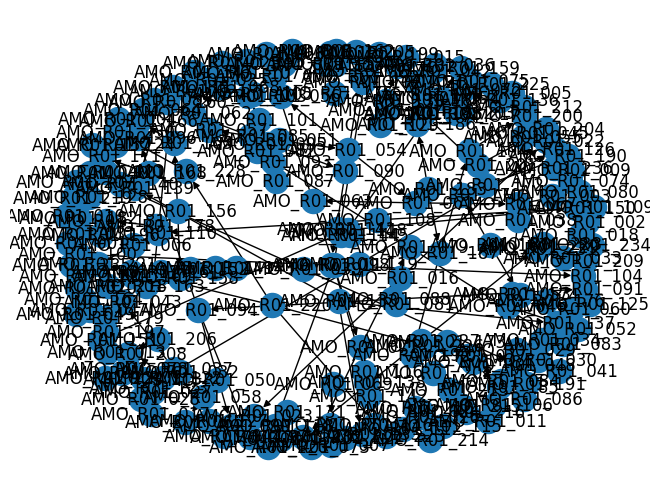

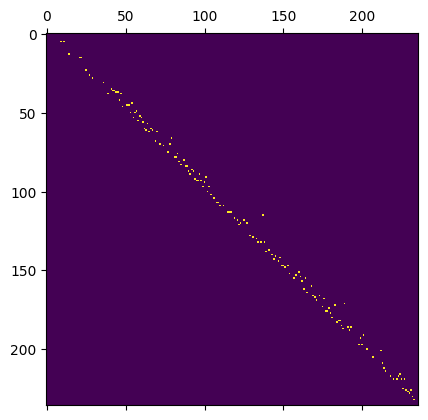

In [422]:
def interaction_graph(data):
    G = nx.DiGraph()
    for turn in data:
        user_id = turn['user_id']
        reply_to_turn = turn['reply_to_turn']
        if reply_to_turn is not None:
            G.add_edge(reply_to_turn, turn['turn_id'])
        else:
            G.add_node(turn['turn_id'])
    return G

G = interaction_graph(data)
print(f'Node degrees: {node_degrees(G)}')
print(f'Density: {density(G)}')
plot_networkx(G)
plot_adjacency_matrix(G)

Considering A as the **adjacency matrix** of a small social network

In [414]:
A = np.array([
    [0, 1, 1, 0, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0]
])

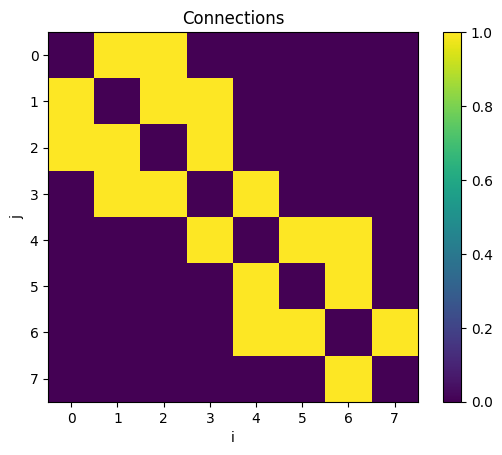

In [415]:
# plot node connections heatmap
plt.imshow(A)
plt.title("Connections")
plt.xlabel("i")
plt.ylabel("j")
plt.colorbar()
plt.show()

## Studying Graphs - Part 2

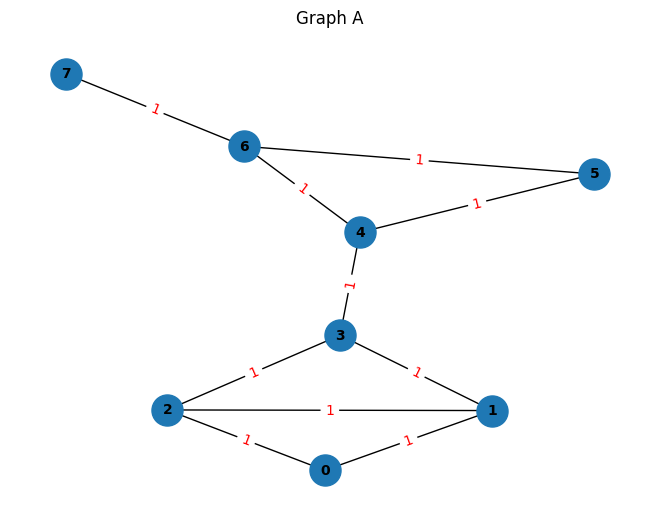

Graph with 8 nodes and 10 edges


In [416]:
#plot graph
G = nx.Graph(A)

layout = nx.spring_layout(G)

nx.draw(G, pos=layout, with_labels=True, node_size=500, font_size=10, font_color='black', font_weight='bold')

edge_labels = nx.get_edge_attributes(G, 'weight')

nx.draw_networkx_edge_labels(G, pos=layout, edge_labels=edge_labels, font_color='red')

plt.title(f'Graph A')

plt.show()

print(f'Graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges')

Degree of a node is the number of edges connected to the node.

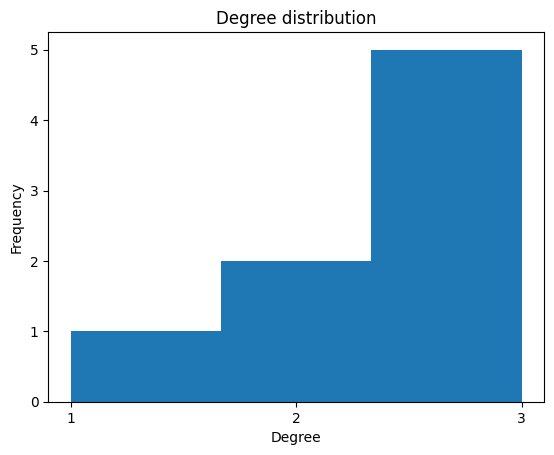

In [417]:
# plot degree distribution
degrees = [val for (node, val) in G.degree()]
plt.hist(degrees, bins=max(degrees)) 
plt.title("Degree distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.xticks(np.arange(1, max(degrees)+1, 1))
plt.show()

In [418]:
# print weight of each node
print(f'Weight of each node: {G.degree()}')

Weight of each node: [(0, 2), (1, 3), (2, 3), (3, 3), (4, 3), (5, 2), (6, 3), (7, 1)]


**Degree Centrality:**

- Definition: Degree centrality measures how well-connected a node is in a network. It is calculated by counting the number of edges (or connections) that a node has.

- Interpretation: Nodes with high degree centrality are highly connected to other nodes in the network. They often represent influential or important nodes that have many interactions or connections.

- Use Cases: Degree centrality is useful for identifying key nodes in social networks, citation networks, and any network where the number of connections matters.

The degree centrality $C_d$ of a node in a network is calculated as the **ratio of the number of edges** incident to the node **$(d_v)$** to the **total number of nodes** in the network $(N-1)$, where **N** is the **total number of nodes** in the network.

$$ C_d(v) = \frac{d_v}{N-1}  $$

In this formula:
- **$ C_d(v) $** represents the degree centrality of node **$ v $**.
- **$ d_v $** is the degree of node $ v $, which is the number of edges incident to node **$ v $**.
- **$ N $** is the total number of nodes in the network.

**Betweenness Centrality:**

- Definition: Betweenness centrality measures the number of times a node lies on the shortest path between other nodes in the network. It is calculated by counting the number of shortest paths between pairs of nodes that pass through a given node.

- Interpretation: Nodes with high betweenness centrality are often bottleneck nodes that connect disparate parts of the network. They often represent key bridges or critical information brokers that connect different groups of nodes.

- Use Cases: Betweenness centrality is useful for identifying key nodes in social networks, transportation networks, and any network where information or resources must flow through a central node.

- Formula: Betweenness centrality is calculated by counting the number of shortest paths between pairs of nodes that pass through a given node.

$$ C_b(v) = \sum_{s \neq v \neq t \in V} \frac{\sigma_{st}(v)}{\sigma_{st}} $$
In this formula:
- **$ C_b(v) $** represents the betweenness centrality of node **$ v $**.
- **$ \sigma_{st} $** is the total number of shortest paths from node **$ s $** to node **$ t $**.
- **$ \sigma_{st}(v) $** is the number of those paths that pass through node **$ v $**.


### Closeness Centrality:

- Definition: Closeness centrality measures how close a node is to all other nodes in the network. It is calculated by adding up the shortest paths between a node and all other nodes in the network.

- Interpretation: Nodes with high closeness centrality are often central nodes that can quickly interact with all other nodes in the network. They often represent influential or important nodes that can spread information efficiently.

- Use Cases: Closeness centrality is useful for identifying key nodes in social networks, transportation networks, and any network where information or resources must flow efficiently.

- Formula: Closeness centrality is calculated by adding up the shortest paths between a node and all other nodes in the network.

$$ C_c(v) = \frac{N-1}{\sum_{t \in V} d(v,t)} $$

In this formula:
- **$ C_c(v) $** represents the closeness centrality of node **$ v $**.
- **$ N $** is the total number of nodes in the network.
- **$ d(v,t) $** is the shortest path distance between node **$ v $** and node **$ t $**.

### Eigenvector Centrality:

- Definition: Eigenvector centrality measures the influence of a node in a network. It is calculated by assigning relative scores to all nodes in the network based on the principle that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

- Interpretation: Nodes with high eigenvector centrality are often highly connected to other nodes that are themselves well-connected in the network. They often represent influential or important nodes that can spread information efficiently.

- Use Cases: Eigenvector centrality is useful for identifying key nodes in social networks, citation networks, and any network where the number of connections matters.

- Formula: Eigenvector centrality is calculated by assigning relative scores to all nodes in the network based on the principle that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

$$ x_v = \frac{1}{\lambda} \sum_{t \in M(v)} x_t $$

In this formula:

- **$ x_v $** represents the eigenvector centrality of node **$ v $**.

- **$ \lambda $** is the largest eigenvalue of the adjacency matrix **$ A $**.

- **$ M(v) $** is the set of neighbors of node **$ v $**.

- **$ x_t $** is the eigenvector centrality of node **$ t $**.

### PageRank:

- Definition: PageRank is a variant of eigenvector centrality that measures the influence of a node in a network. It is calculated by assigning relative scores to all nodes in the network based on the principle that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

- Interpretation: Nodes with high PageRank are often highly connected to other nodes that are themselves well-connected in the network. They often represent influential or important nodes that can spread information efficiently.

- Use Cases: PageRank is useful for identifying key nodes in citation networks, and any network where the number of connections matters.

- Formula: PageRank is calculated by assigning relative scores to all nodes in the network based on the principle that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

$$ x_v = \frac{1-d}{N} + d \sum_{t \in M(v)} \frac{x_t}{N_t} $$

In this formula:

- **$ x_v $** represents the PageRank of node **$ v $**.

- **$ d $** is the damping factor, which is usually set to 0.85.

- **$ N $** is the total number of nodes in the network.

- **$ M(v) $** is the set of neighbors of node **$ v $**.

- **$ N_t $** is the total number of neighbors of node **$ t $**.

- **$ x_t $** is the PageRank of node **$ t $**.

### Hubs and Authorities:

- Definition: Hubs and authorities are variants of eigenvector centrality that measure the influence of a node in a network. They are calculated by assigning relative scores to all nodes in the network based on the principle that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

- Interpretation: Nodes with high hub scores are often highly connected to other nodes that are themselves well-connected in the network. They often represent influential or important nodes that can spread information efficiently. Nodes with high authority scores are often connected from other nodes that are themselves well-connected in the network. They often represent influential or important nodes that can spread information efficiently.

- Use Cases: Hubs and authorities are useful for identifying key nodes in citation networks, and any network where the number of connections matters.

- Formula: Hubs and authorities are calculated by assigning relative scores to all nodes in the network based on the principle that connections to high-scoring nodes contribute more to the score of the node in question than equal connections to low-scoring nodes.

$$ x_v = \sum_{t \in M(v)} y_t $$

$$ y_v = \sum_{t \in L(v)} x_t $$

In these formulas:

- **$ x_v $** represents the authority score of node **$ v $**.

- **$ y_v $** represents the hub score of node **$ v $**.

- **$ M(v) $** is the set of neighbors of node **$ v $**.

- **$ L(v) $** is the set of nodes that point to node **$ v $**.

- **$ x_t $** is the authority score of node **$ t $**.

- **$ y_t $** is the hub score of node **$ t $**.

In [419]:
# Node centrality measures
print(f'Node centrality measures:')
print(f'Degree centrality: {nx.degree_centrality(G)}')
print(f'Betweenness centrality: {nx.betweenness_centrality(G)}')
print(f'Closeness centrality: {nx.closeness_centrality(G)}')
print(f'Eigenvector centrality: {nx.eigenvector_centrality(G)}')

Node centrality measures:
Degree centrality: {0: 0.2857142857142857, 1: 0.42857142857142855, 2: 0.42857142857142855, 3: 0.42857142857142855, 4: 0.42857142857142855, 5: 0.2857142857142857, 6: 0.42857142857142855, 7: 0.14285714285714285}
Betweenness centrality: {0: 0.0, 1: 0.11904761904761904, 2: 0.11904761904761904, 3: 0.5714285714285714, 4: 0.5714285714285714, 5: 0.0, 6: 0.2857142857142857, 7: 0.0}
Closeness centrality: {0: 0.35, 1: 0.4666666666666667, 2: 0.4666666666666667, 3: 0.5833333333333334, 4: 0.5833333333333334, 5: 0.4375, 6: 0.4666666666666667, 7: 0.3333333333333333}
Eigenvector centrality: {0: 0.3477950444759982, 1: 0.47377662231241896, 2: 0.47377662231241896, 3: 0.4692125173435638, 4: 0.33079430754815964, 5: 0.2048127297117387, 6: 0.22720419864997973, 7: 0.08339525684417314}


In [420]:
partition = community.best_partition(G)

community_colors = [partition[node] for node in G.nodes()]

# Community assignments
for node, community_id in partition.items():
    print(f"Node {node}: Community {community_id}")

# Listing nodes in each community
communities = {}
for node, community_id in partition.items():
    if community_id in communities:
        communities[community_id].append(node)
    else:
        communities[community_id] = [node]

AttributeError: module 'community' has no attribute 'best_partition'